In [8]:
!pip install sinfo

  Using cached sinfo-0.3.4.tar.gz (24 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/79.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/79.8 kB ? eta -:--:--
   ---------- ----------------------------- 20.5/79.8 kB ? eta -:--:--
   ----------------------------------- ---- 71.7/79.8 kB 975.2 kB/s eta 0:00:01
   ---------------------------------------- 79.8/79.8 kB 892.0 kB/s eta 0:00:00
  Created wheel for sinfo: filename=sinfo-0.3.4-py3-none-any.whl size=7932 sha256=6a55793f370ef26d4910beca253e871f8109da1d2289ba776360452e9ce170f0
  Stored in directory: c:\users\juanj\appdata\local\pip\cache\wheels\d4\63\ea\40b6de0d9c3a559fafca2ec9680cee404407958304d8b58ef1
Successfully built sinfo


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un DataFrame con los valores proporcionados
data_values = [
    [-3.1, 0.28, 3.2, 4.6],
    [3.6, 2.5, 0.02, 1.2],
    [4.5, 1.12, 0.036, -1.1],
    [2.1, -0.38, -0.98, -2.3],
    [-2.01, 0, 0.56, 1.12],
    [-1.6, -1.29, -0.22, 0.8],
    [-3.28, -2.06, 0.17, 4.6],
    [2.17, 0.13, -4.81, -1.09]
]

data = pd.DataFrame(data_values, columns=['A', 'B', 'C', 'D'])
data

# Crear el DataFrame con los valores proporcionados
data_values = [
    [-3.10, 0.28, 3.2, 4.6],
    [3.6, 2.5, 0.02, 1.2],
    [4.5, 1.12, 0.036, -1.1],
    [2.1, -0.38, -0.98, -2.3],
    [-2.01, 0, 0.56, 1.12],
    [-1.6, -1.29, -0.22, 0.8],
    [-3.28, -2.06, 0.17, 4.6],
    [2.17, 0.13, -4.81, -1.09]
]

data = pd.DataFrame(data_values, columns=['A', 'B', 'C', 'D'])

# Crear una máscara para los outliers
outlier_mask = (data.abs() > 3)

# Crear un DataFrame con np.sign() aplicado a todos los valores
sign_data = np.sign(data)

# Crear el resultado final, manteniendo los outliers y reemplazando los demás valores con 1, -1 o 0
result = data.where(outlier_mask, sign_data)

# Filtrar solo las filas que contienen outliers
rows_with_outliers = result.dropna(how='all')
rows_with_outliers

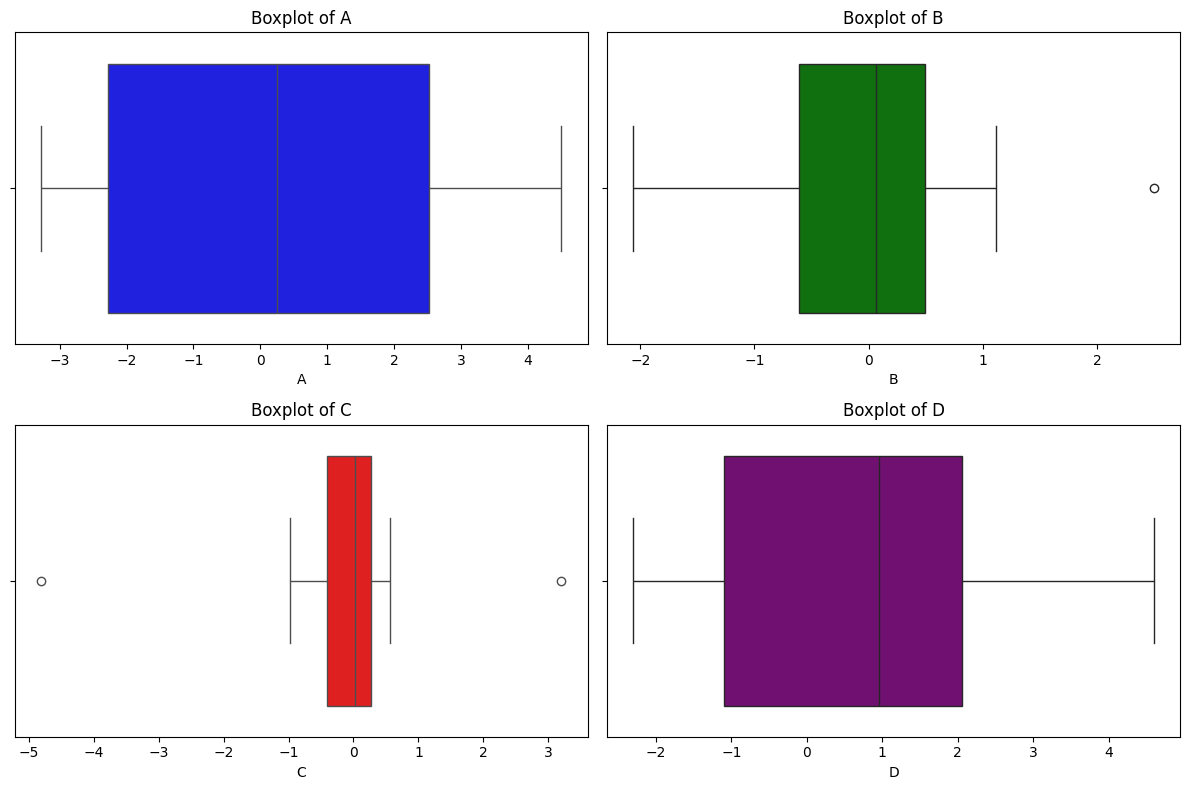

,A,B,C,D
0,-3.10,1.0,3.20,4.6
1,3.60,1.0,1.00,1.0
2,4.50,1.0,1.00,-1.0
3,1.00,-1.0,-1.00,-1.0
4,-1.00,0.0,1.00,1.0
5,-1.00,-1.0,-1.00,1.0
6,-3.28,-1.0,1.00,4.6
7,1.00,1.0,-4.81,-1.0


In [49]:
# Crear el DataFrame con los valores proporcionados
data_values = [
    [-3.10, 0.28, 3.2, 4.6],
    [3.6, 2.5, 0.02, 1.2],
    [4.5, 1.12, 0.036, -1.1],
    [2.1, -0.38, -0.98, -2.3],
    [-2.01, 0, 0.56, 1.12],
    [-1.6, -1.29, -0.22, 0.8],
    [-3.28, -2.06, 0.17, 4.6],
    [2.17, 0.13, -4.81, -1.09]
]

data = pd.DataFrame(data_values, columns=['A', 'B', 'C', 'D'])

# Crear una máscara para los outliers
outlier_mask = (data.abs() > 3)

# Crear un DataFrame con np.sign() aplicado a todos los valores
sign_data = np.sign(data)

# Crear el resultado final, manteniendo los outliers y reemplazando los demás valores con 1, -1 o 0
result = data.where(outlier_mask, sign_data)

# Filtrar solo las filas que contienen outliers
rows_with_outliers = result.dropna(how='all')

# Visualizar los outliers usando boxplots con distintos colores y orientación horizontal
plt.figure(figsize=(12, 8))

# Crear un boxplot para cada columna con un color diferente
colors = ['blue', 'green', 'red', 'purple']
for i, (column, color) in enumerate(zip(rows_with_outliers.columns, colors), 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=data[column], color=color)
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

rows_with_outliers


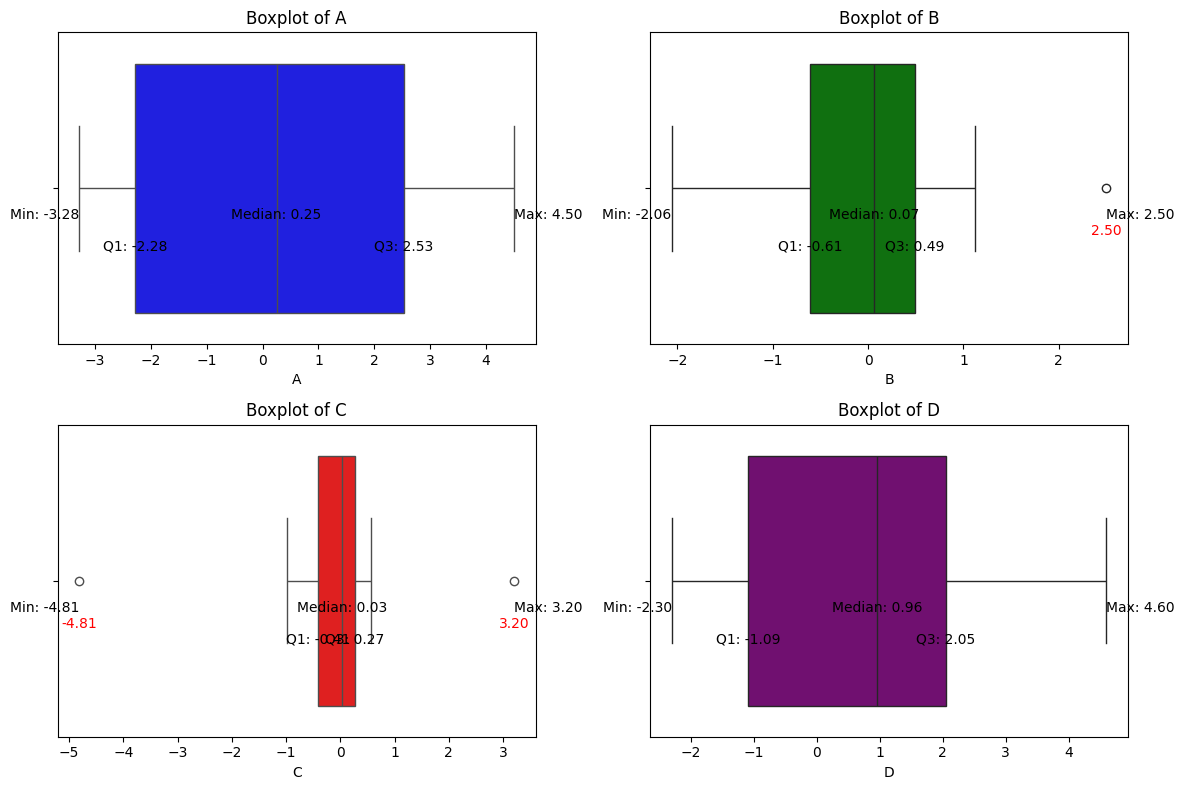

In [50]:
# Visualizar los outliers usando boxplots con distintos colores y orientación horizontal, mostrando etiquetas
plt.figure(figsize=(12, 8))

# Crear un boxplot para cada columna con un color diferente
colors = ['blue', 'green', 'red', 'purple']
for i, (column, color) in enumerate(zip(rows_with_outliers.columns, colors), 1):
    plt.subplot(2, 2, i)
    boxplot = sns.boxplot(x=data[column], color=color)
    plt.title(f'Boxplot of {column}')

    # Calcular estadísticas descriptivas
    stats = data[column].describe()
    min_val = stats['min']
    max_val = stats['max']
    median = stats['50%']
    q1 = stats['25%']
    q3 = stats['75%']

    # Añadir etiquetas para el valor mínimo, máximo, mediana, y cuartiles
    plt.text(min_val, 0.1, f'Min: {min_val:.2f}', horizontalalignment='right', color='black')
    plt.text(max_val, 0.1, f'Max: {max_val:.2f}', horizontalalignment='left', color='black')
    plt.text(median, 0.1, f'Median: {median:.2f}', horizontalalignment='center', color='black')
    plt.text(q1, 0.2, f'Q1: {q1:.2f}', horizontalalignment='center', color='black')
    plt.text(q3, 0.2, f'Q3: {q3:.2f}', horizontalalignment='center', color='black')

    # Añadir etiquetas para los outliers
    for outlier in data[column][(data[column] < q1 - 1.5 * (q3 - q1)) | (data[column] > q3 + 1.5 * (q3 - q1))]:
        plt.text(outlier, 0.15, f'{outlier:.2f}', horizontalalignment='center', color='red')

plt.tight_layout()
plt.show()


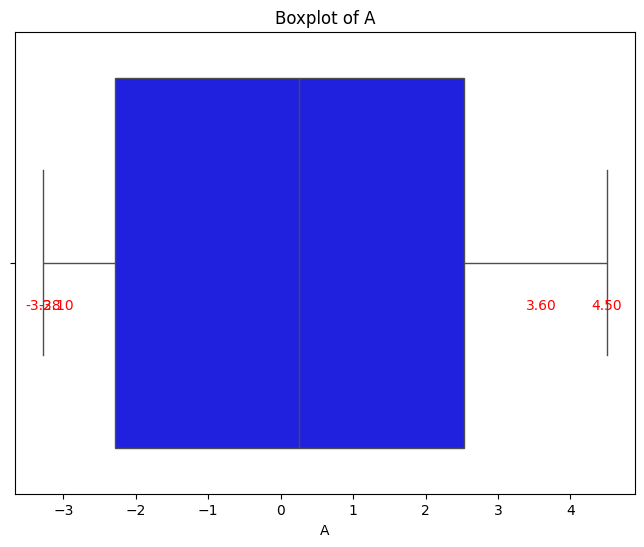

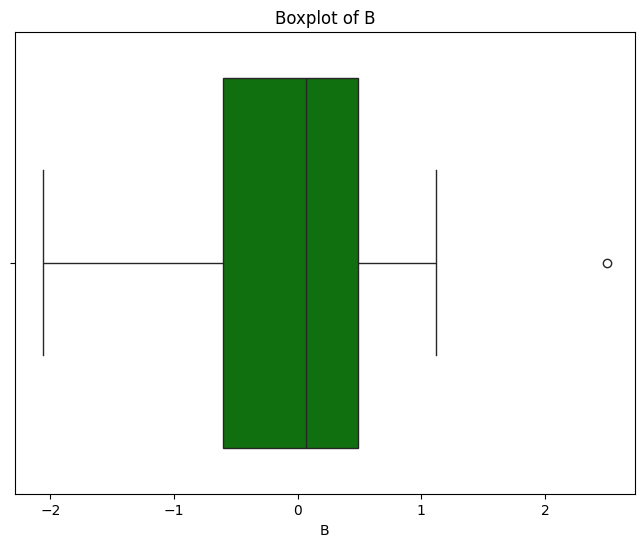

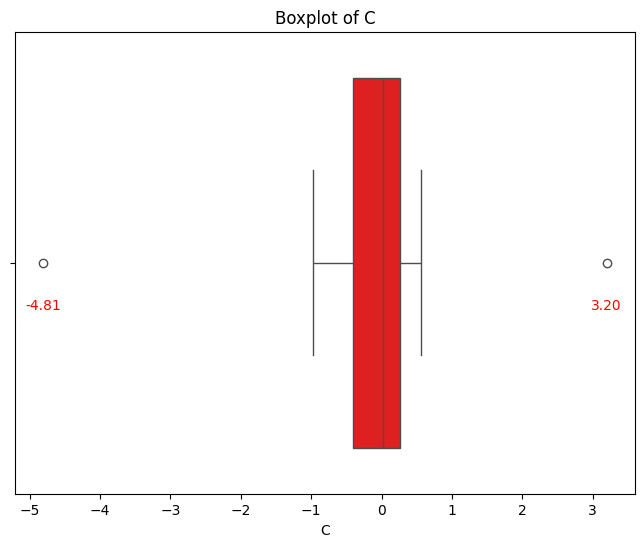

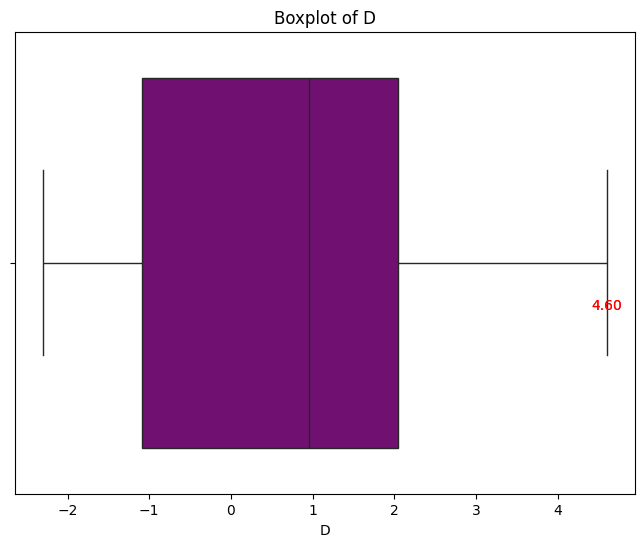

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Crear el DataFrame con los valores proporcionados
data_values = [
    [-3.10, 0.28, 3.2, 4.6],
    [3.6, 2.5, 0.02, 1.2],
    [4.5, 1.12, 0.036, -1.1],
    [2.1, -0.38, -0.98, -2.3],
    [-2.01, 0, 0.56, 1.12],
    [-1.6, -1.29, -0.22, 0.8],
    [-3.28, -2.06, 0.17, 4.6],
    [2.17, 0.13, -4.81, -1.09]
]

data = pd.DataFrame(data_values, columns=['A', 'B', 'C', 'D'])

# Crear una máscara para los outliers
outlier_mask = (data.abs() > 3)

# Mantener los outliers y reemplazar los demás valores con 1, -1 o 0
result = data.where(outlier_mask, np.sign(data))

# Filtrar solo las filas que contienen outliers
rows_with_outliers = data[outlier_mask.any(axis=1)]

# Visualizar los outliers usando boxplots con distintos colores y orientación horizontal
colors = ['blue', 'green', 'red', 'purple']
for column, color in zip(data.columns, colors):
    plt.figure(figsize=(8, 6))
    boxplot = sns.boxplot(x=data[column], color=color)
    plt.title(f'Boxplot of {column}')

    # Añadir etiquetas para los outliers
    outliers = data[column][outlier_mask[column]]
    for outlier in outliers:
        plt.text(outlier, 0.1, f'{outlier:.2f}', horizontalalignment='center', color='red')

    plt.show()


In [52]:
rows_with_outliers = data[outlier_mask.any(axis=1)]
rows_with_outliers

,A,B,C,D
0,-3.10,0.28,3.200,4.60
1,3.60,2.50,0.020,1.20
2,4.50,1.12,0.036,-1.10
6,-3.28,-2.06,0.170,4.60
7,2.17,0.13,-4.810,-1.09


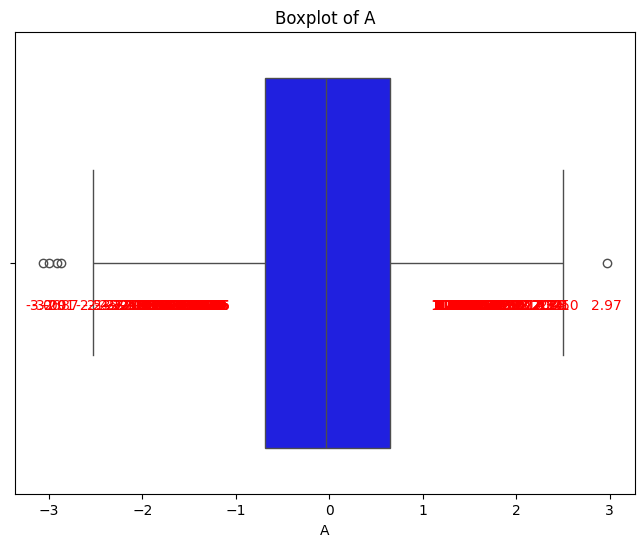

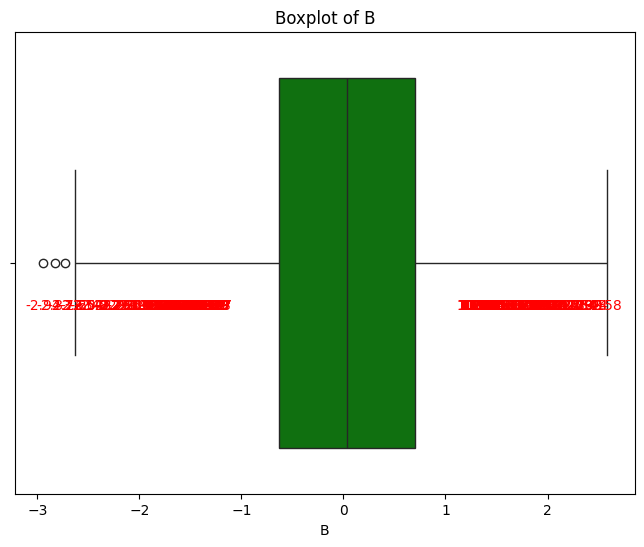

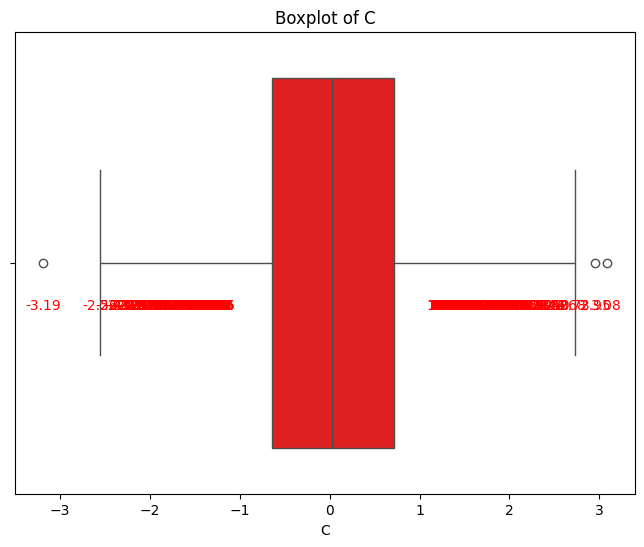

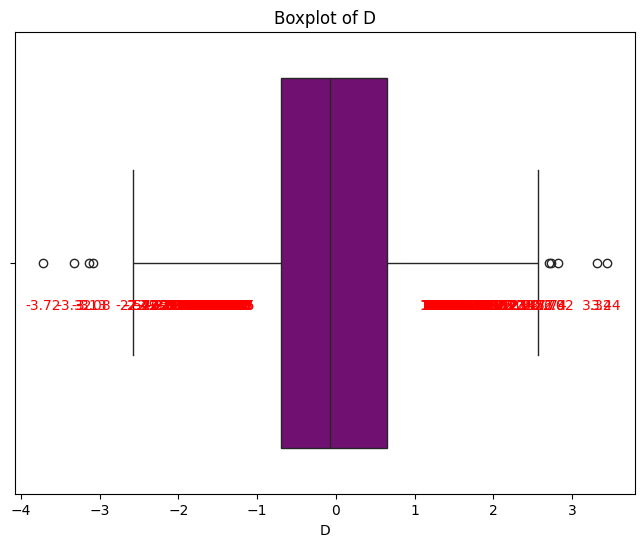

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generar un DataFrame con datos que siguen una distribución normal estándar
data = pd.DataFrame(np.random.standard_normal((1000, 4)), columns=['A', 'B', 'C', 'D'])

# Crear una máscara para los outliers
outlier_mask = (data.abs() > 1.25)

# Mantener los outliers y reemplazar los demás valores con 1, -1 o 0
result = data.where(outlier_mask, np.sign(data))

# Filtrar solo las filas que contienen outliers
rows_with_outliers = data[outlier_mask.any(axis=1)]

# Visualizar los outliers usando boxplots con distintos colores y orientación horizontal
colors = ['blue', 'green', 'red', 'purple']
for column, color in zip(data.columns, colors):
    plt.figure(figsize=(8, 6))
    boxplot = sns.boxplot(x=data[column], color=color)
    plt.title(f'Boxplot of {column}')

    # Añadir etiquetas para los outliers
    outliers = data[column][outlier_mask[column]]
    for outlier in outliers:
        plt.text(outlier, 0.1, f'{outlier:.2f}', horizontalalignment='center', color='red')

    plt.show()

In [3]:
outlier_mask = (data.abs() > 1.25)
outlier_mask

,A,B,C,D
0,False,True,False,False
1,False,False,False,False
2,False,True,False,False
3,False,False,False,False
4,False,True,False,False
...,...,...,...,...
995,False,False,True,False
996,False,False,False,True
997,False,True,True,False
998,True,False,False,False


In [4]:
result = data.where(outlier_mask, np.sign(data))
result

,A,B,C,D
0,-1.000000,-1.365909,-1.000000,-1.00000
1,1.000000,1.000000,-1.000000,1.00000
2,1.000000,-2.598974,1.000000,-1.00000
3,-1.000000,1.000000,-1.000000,-1.00000
4,1.000000,2.159792,1.000000,-1.00000
...,...,...,...,...
995,-1.000000,1.000000,1.286516,-1.00000
996,1.000000,-1.000000,1.000000,-1.32245
997,-1.000000,1.274676,-1.354349,1.00000
998,-1.309684,-1.000000,1.000000,-1.00000


In [6]:
rows_with_outliers = data[outlier_mask.any(axis=1)]
rows_with_outliers

,A,B,C,D
0,-0.350611,-1.365909,-1.241709,-0.749592
2,0.952531,-2.598974,0.380031,-0.878745
4,0.970314,2.159792,0.367739,-0.429671
7,0.010763,-0.060449,1.713809,-0.259292
9,-0.902694,-1.756827,0.822883,2.704092
...,...,...,...,...
995,-0.006345,0.951092,1.286516,-0.554021
996,0.346215,-0.024858,0.708113,-1.322450
997,-0.939074,1.274676,-1.354349,0.553254
998,-1.309684,-0.436125,0.597406,-0.651678


In [54]:
rows_with_outliers

,A,B,C,D
1,1.259473,-2.101309,0.147716,0.608668
7,2.146339,0.182904,1.876747,-1.104837
8,-0.240549,1.154921,1.416730,0.160323
9,-0.011665,-0.562735,0.416472,1.981488
11,0.158804,0.037960,-2.138655,0.856480
...,...,...,...,...
994,1.396430,0.985538,0.825982,2.245194
995,0.934817,-0.754530,-0.506246,1.379325
996,-0.358144,1.884287,-1.609703,-1.427645
998,-0.376678,2.836793,2.120081,-0.954699


In [9]:
from sinfo import sinfo
sinfo()

The `sinfo` package has changed name and is now called `session_info` to become more discoverable and self-explanatory. The `sinfo` PyPI package will be kept around to avoid breaking old installs and you can downgrade to 0.3.2 if you want to use it without seeing this message. For the latest features and bug fixes, please install `session_info` instead. The usage and defaults also changed slightly, so please review the latest README at https://gitlab.com/joelostblom/session_info.
-----
matplotlib  3.9.0
numpy       2.0.0
pandas      2.2.2
seaborn     0.13.2
sinfo       0.3.4
-----
IPython             8.14.0
jupyter_client      8.3.0
jupyter_core        5.3.1
jupyterlab          4.0.11
notebook            7.0.8
-----
Python 3.11.9 | packaged by Anaconda, Inc. | (main, Apr 19 2024, 16:40:41) [MSC v.1916 64 bit (AMD64)]
Windows-10-10.0.22631-SP0
8 logical CPU cores, Intel64 Family 6 Model 140 Stepping 1, GenuineIntel
-----
Session information updated at 2024-07-09 17:41
